## Markov Chain Monte-Carlo (MCMC)

#### *15 November 2019*

#### *DATA 1010*

In [1]:
using Plots, Random, LinearAlgebra, Statistics, Distributions, Interact, LaTeXStrings
gr(fontfamily="Palatino",legend=false);

## Problem 1

Last time we discussed the following Markov chain:

<center>
   <img src="markov-chain.svg" width="400px">
</center>

We discovered that its *stationary distribution* (the probability distribution of the walker's location after a large number of steps) is $[4/9, 2/9, 2/9, 1/9]$. In this problem, we'll see why this distribution is an eigenvector of $P'$ (the transpose of $P$).

(a) Suppose that $\nu$ is a row vector describing the probability distribution of the walker's state at a given time $n$. Show that $\nu P$ describes the state of the the walker at time $n+1$. 


The probability of ending up in state $j$ after one step is equal to the probability of being in state 1 and transitioning to state $j$, plus the probability of being in state 2 and transitioning to state $j$, and so on. In other words, it's $\nu_1P_{1,j} + \nu_nP_{n,j} + \cdots + \nu_nP_{n,j}$. That's the same as the $j$th entry of $\nu P$, so indeed, the entries of $\nu P$ give the probabilities of being in state $j$ after one step, starting from the distribution $\nu$. 

(b) The stationary distribution is characterized by not changing from one step to the next:

In [2]:
P = [1/2 1/2  0    0   
     1/2  0  1/2   0   
      0   0  1/2  1/2 
      1   0   0    0]
@manipulate for n in 0:20
    sticks((P^n)[1,:], label = "probability mass", linewidth = 12, title = "\$n = $n\$", 
            size = (400, 200), ylims = (0, 1), xlabel = L"j", ylabel = L"P^n_{1,j}")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 20,:min => 0,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
10, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/sswatson/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/sswatson/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/sswatson/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/sswatson/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/sswatson/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000011d636410, Task (runnable) @0x000000011d636410), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0\",\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"16533648420701154668\",\"id\":\"ob_1

Use this observation together with part (a) to write down an equation that the stationary distribution should satisfy.

The stationary distribution satisfies $\nu = \nu P$. In other words, it's left-eigenvector of $P$ with eigenvector 1.

Final note: a beautiful theorem in linear algebra called the **Perron Frobenius** theorem says that if $P$ is a square matrix of positive entries whose rows sum to 1 and for which some power of the matrix has all positive entries, then $P'$ has a unique eigenvector with eigenvalue 1, and that eigenvector can be chosen to have positive entries. Furthermore, the limit of $P^n$ as $n\to\infty$ is the matrix with this eigenvector in every row.

Express the "*some power of the matrix has all positive entries*" condition in Markov chain terms.

It means that there's some number of steps such that you can get from anywhere to anywhere in that number of steps. 

---

Suppose we wanted to sample from the distribution $[4/9, 2/9, 2/9, 1/9]$. Problem 1 tells us that we could do that approximately by starting wherever and running this Markov chain for a few dozen steps. Isn't that a silly thing to do, given that we could just use the inverse CDF trick (generate a $\operatorname{Unif}([0,1])$ and see whether it's in $[0,4/9), [4/9,6/9), [6/9,8/9),$ or $[8/9,1)$). Furthermore, how could we have cooked up those transition probabilities, starting from the desired stationary distribution?

It turns out that these questions have good answers: we *can* find suitable transition probabilities in a very general way, and there are many cases where that works and simpler techniques don't.

## Problem 2

One popular technique for finding transition probabilities which give rise to a pre-specified stationary distribution $\nu$ is called **Metropolis-Hastings**. Suppose $\Omega$ is the set we're looking to sample from, and $f$ is either the PMF or PDF of $\nu$. Metropolis-Hastings defines the following Markov chain:

* For each $x\in \Omega$, let $q(x)$ be a distribution on $\Omega$ that we can readily sample from, and for which $q(x)(y) = q(y)(x)$ for all $x$ and $y$ in $\Omega$.
* Choose the initial state $X_0$ arbitrarily, and sample $X_{\text{prop}}$ from the distribution $q(X_0)$
* Define $X_1$ to be $X_{\text{prop}}$ with probability $\frac{f(X_{\text{prop}})}{f(X_0)}$ (or 1, if this ratio exceeds 1) and $X_0$ otherwise.
* Repeat steps (ii) and (iii) to obtain $X_2$ from $X_1$, $X_3$ from $X_2$, and so on.

Note: we call $\frac{f(X_{\text{prop}})}{f(X_0)}$ the **acceptance ratio** $\alpha(X_0, X_{\text{prop}})$, since it determines the probability with which we accept the proposal.

Consider the four-element $\Omega$ studied in problem 1, with desired stationary distribution $\nu$ given by the same vector $[4/9, 2/9, 2/9, 1/9]$. Suppose that the proposal distributions $q$ are defined by $q(x)(y) = 1/2$ if $x$ and $y$ are cyclic neighbors (that is, D and B are the neighbors of A, etc.). Find the transition probabilities specified by the Metropolis-Hastings algorithm. Confirm numerically that the desired stationary distribution is achieved.

*Solution*. The probability of moving from $B$ given that you start at $A$ is the probability that the proposal suggests $B$, which is $1/2$, multiplied by the probability you accept the proposal, which is $\frac{2/9}{4/9} = 1/2$. So that entry is 1/4. Likewise, the transition probability from $A$ to $D$ is $\frac{1}{8}$. Continuing in this way, we fill out the matrix, and it indeed gives rise to the desired stationary distribution:

In [3]:
P = [5/8 1/4 0 1/8
     1/2 0 1/2 0
     0 1/2 1/4 1/4
     1/2 0 1/2 0]

P^100

4×4 Array{Float64,2}:
 0.444444  0.222222  0.222222  0.111111
 0.444444  0.222222  0.222222  0.111111
 0.444444  0.222222  0.222222  0.111111
 0.444444  0.222222  0.222222  0.111111

## Problem 3

Now let's consider an example where MCMC adds value relative to other sampling methods. 

Suppose that $\Omega$ is the set of tweets consisting entirely of letters (that is, length-280 strings). Consider the probability measure on $\Omega$ for which the probability of a particular tweet $(c_1, c_2, \ldots, c_{280})$ is proportional to 
$$
g(c_1,c_2)g(c_2,c_3)\ldots g(c_{279},c_{280}), 
$$
where, for two letters $a$ and $b$, $g(a,b)$ is the proportion of two-letter sequences in the English language which are equal to $ab$. For example 

(a) How should we deal with tweets that are less than 280 characters?

(b) How could you estimate $g$ in practice?

(c) How could we generate a random tweet drawn from this probability measure? 

Note: this idea has actually been used to decipher texts; see [this paper](https://math.uchicago.edu/~shmuel/Network-course-readings/MCMCRev.pdf). 


*Solution*. 
(a) We could pad them out with spaces, or we could modify the mass function directly.

(b) We could download a bunch of tweets and count frequencies of letter pairs.

(c) We follow the Metropolis-Hastings idea: begin somewhere in the space $\Omega$, let's say the sequence of all `a`'s. Then we choose a simple proposal distribution; perhaps the proposer chooses a single position and changes the letter in that position $k$ to a letter chosen uniformly at random from the alphabet. Then we accept that proposal with probability $\min\left(1, \frac{g(c_{k-1}, \tilde{c}_k)g(\tilde{c}_{k},c_{k+1})}{g(c_{k-1}, c_k)g(c_{k},c_{k+1})}\right)$, where $\tilde{c}_k$ is the new proposed letter in the $k$th position (note that all of the other factors of $g$ cancel!).

If we perform these Metropolis updates many times, our location in $\Omega$ will be distributed according to the desired probability mass function. 

## Problem 4

Finally, let's see how to use MCMC to do Bayesian linear regression. 

Consider a linear regression model $y = mx + b + ϵ$, where $\epsilon$ is normally distributed with mean 0 and variance $1$. We'll treat the parameters $m$ amd $b$ as Bayesian parameters, meaning that they're random variables with some distribution. As priors, let's take normal distributions with mean 0 and variance 100 for both $m$ and $b$.

Our goal is to sample from the posterior distribution given some observations $(x_i, y_i)$ as $i$ ranges from 1 to $n$. Let's use kind of an extreme example to make the point:

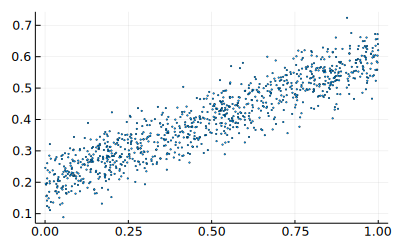

In [4]:
x = rand(Uniform(0, 1), 1000)
y_mean = 0.4x .+ 0.2
y = y_mean + rand(Normal(0, 0.05), 1000)
function observations()
    scatter(x, y, ms = 1, msw = 0.2, size = (400, 250))
end
observations()

To sample from the posterior, we'll use Metropolis-Hastings on the parameters $m$ and $b$. That means we'll start at initial values $(m_0, b_0)$ for those variables, then propose an update drawn from $q(m_0, b_0)$. We'll calculate the acceptance ratio for the posterior distribution, move or stay based on that ratio, and so on. 

(a) What is the acceptance ratio for the posterior distribution, given the observations?

*Solution*. Since posterior is proportional to likelihood times prior, we need to compute likelihood ratios and ratios of priors. The latter we'll get by deferring to Julia's `pdf`, but the former we can do analytically. Given $m$ and $b$, the probability density evaluated at the observed data is 
$$
\prod_{i=1}^n\exp(-(y_i - mx_i - b)^2/2) = \exp\left(-\sum_{i=1}^n(y_i - mx_i - b)^2/2\right). 
$$
Let's code this up. 

In [5]:
N = Normal(0, 10)
δ(x,y,m,b) = sum((yᵢ - m*xᵢ - b)^2/2 for (xᵢ, yᵢ) in zip(x,y))
function α(x, y, m, b, m_prop, b_prop)
    min(1.0, exp(-δ(x,y,m_prop,b_prop) + δ(x,y,m,b)) * 
        pdf(N, m_prop)/pdf(N, m) * pdf(N, b_prop)/pdf(N, b))
end

α (generic function with 2 methods)

Now we can perform the Markov chain iterations. As a proposal distribution, for simplicity we'll just add a small-variance Gaussian to each parameter.

In [6]:
function mcmc(n_iterations)
    m, b, σ = 0.0, 0.0, 1.0
    θs = [(m, b)]
    for i in 1:n_iterations
        m_prop, b_prop = m + rand(Normal(0,0.005)), b + rand(Normal(0,0.005))
        if rand() < α(x, y, m, b, m_prop, b_prop)
            m, b = m_prop, b_prop
            push!(θs, (m, b))
        end
    end
    θs
end

mcmc (generic function with 1 method)

Now let's visualize the result: 

In [7]:
θs = mcmc(3_000);

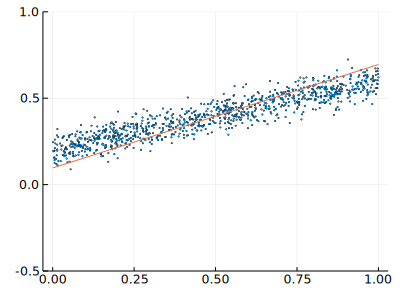

In [8]:
#@manipulate for i in slider(1:length(θs), value = 1)
m, b = θs[end]
observations()
plot!(0:1, x-> m*x + b, size = (400, 300), ylims = (-0.5, 1))
#end

Note that it takes quite a while for the influence of the starting state to wear off; this is called the **burn-in** phase. After that, the line fluctates around the region where there is a significant amount of posterior probability mass (in $(m,b)$ space). This is reflecting the fact that the posterior distribution is a *distribution*, not just a single value as in frequentist statistics. 